# Stage4 深層学習day3

## 深層学習day3

##  0、深層学習全体像の復習
### &emsp;&emsp; 最新のCNN  (AlexNetを事例で紹介）
### &emsp;&emsp; Stage3 Day2で説明を書いたので、ここでは省略

#### 0.1　確認テスト:
#### &emsp;&emsp; サイズ5×5の入力画像を、サイズ3×3のフィルタで畳み込んだ時の出力画像のサイズを答えよ。
#### &emsp;&emsp; なおストライドは2、パディングは1とする。
##### &emsp;&emsp; 　解答：3 x 3
##### &emsp;&emsp;  計算式：
##### &emsp;&emsp;  Oh = (画像の高さ + 2 x パディング数　- フィルターの高さ) / ストライド)+1
##### &emsp;&emsp;  Oh = (5 + 2 x 1 - 3) / 2)+1  = 3

##  １、Section1：再帰型ニューラルネットワークの概念
###  &emsp;&emsp; 1.1　要点まとめ
###  &emsp;&emsp; 1.1.1　RNN全体像
####  &emsp;&emsp;&emsp;&emsp; RNNとは時系列データが処理出来るニューラルネットワークである。
####  &emsp;&emsp;&emsp;&emsp; 時系列データとは時間的順序を持って一定間隔ごとに観察されるデータ群。


In [1]:
from IPython.display import Image
Image(url= 'https://raw.githubusercontent.com/mutsumutsu67/rapid_challenge/main/stage4_day3_section1.jpg')

###  &emsp;&emsp; 1.1.2　BPTT（Back-Propagation Through Time）
#### &emsp;&emsp;&emsp;  RNNでの逆誤差伝搬法です。
#### &emsp;&emsp;&emsp;&emsp; $ u^t = W_{(in} x^t + W z^{t-1} + b $
#### &emsp;&emsp;&emsp;&emsp; $ z^t = f( W_{(in} x^t + W z^{t-1} + b ) $
#### &emsp;&emsp;&emsp;&emsp; $ v^t = W_{(out)} z^{t} + c $
#### &emsp;&emsp;&emsp;&emsp; $ y^t = g(W_{(out)}z^t + c ) $
#### &emsp;&emsp;&emsp;
#### &emsp;&emsp;&emsp;&emsp; $ E^t = loss ( y^t , d^t ) $
#### &emsp;&emsp; RNNの課題
#### &emsp;&emsp; &emsp; 時系列を遡れば遡るほど、勾配が消失していく。勾配消失問題を持っている。
#### &emsp;&emsp; &emsp; （これはCNNと同じ。微分が繰り返されるから）

####  &emsp;&emsp; 1.2　実装演習結果と考察
####  &emsp;&emsp; 1.2.1　実装演習結果 (3_1_simple_RNN.ipynb)

In [2]:
from IPython.display import Image
Image(url= 'https://raw.githubusercontent.com/mutsumutsu67/rapid_challenge/main/stage4_day3_sectino1_3_1_simple_RNN_handson.jpg')

##### ハンズオン中の試してみようを実施しました。
##### [try] weight_init_stdやlearning_rate, hidden_layer_sizeを変更してみよう

##### [try] 重みの初期化方法を変更してみよう
##### &emsp;&emsp;&emsp;Xavier, He

##### [try] 中間層の活性化関数を変更してみよう
##### &emsp;&emsp;&emsp;ReLU(勾配爆発を確認しよう)
##### &emsp;&emsp;&emsp;tanh(numpyにtanhが用意されている。導関数をd_tanhとして作成しよう)

#####  [try] sigmoid - He と relu - Xavier についても試してみよう(結果のみ表示）

####  &emsp;&emsp; 1.2.1　実装演習結果 (3_1_simple_RNN.ipynb)

In [1]:
from IPython.display import Image
Image(url= 'https://raw.githubusercontent.com/mutsumutsu67/rapid_challenge/main/stage4_day3_sectino1_3_1_simple_RNN_handson.jpg')

iters:0
Loss:2.2605469401456477
Pred:[1 1 1 1 1 1 1 1]
True:[0 0 1 1 0 1 0 0]
52 + 0 = 255
------------
iters:100
Loss:0.8771328604318622
Pred:[1 1 1 0 0 1 1 1]
True:[1 1 1 1 0 0 0 1]
114 + 127 = 231
------------
iters:200
Loss:1.2612702889749918
Pred:[0 1 1 0 0 0 1 1]
True:[1 0 0 1 0 1 0 0]
99 + 49 = 99
------------
iters:300
Loss:1.0793945457354608
Pred:[1 0 0 1 0 0 0 0]
True:[1 0 1 0 1 1 0 0]
75 + 97 = 144
------------
iters:400
Loss:0.9235345369902079
Pred:[0 0 0 0 0 0 0 1]
True:[0 1 1 1 1 0 0 1]
96 + 25 = 1
------------
iters:500
Loss:1.0963228635899016
Pred:[0 0 0 0 0 0 0 1]
True:[0 1 1 0 0 1 1 1]
79 + 24 = 1
------------
iters:600
Loss:1.0146802674611117
Pred:[0 1 1 0 1 1 1 0]
True:[0 0 1 1 0 1 1 0]
47 + 7 = 110
------------
iters:700
Loss:0.8812377912668143
Pred:[0 1 0 0 0 0 0 0]
True:[0 1 0 0 1 1 1 0]
34 + 44 = 64
------------
iters:800
Loss:0.8986920542973698
Pred:[1 1 1 1 1 1 1 1]
True:[1 0 1 0 1 1 0 1]
106 + 67 = 255
------------
iters:900
Loss:0.9725533489723746
Pred:[1 1 

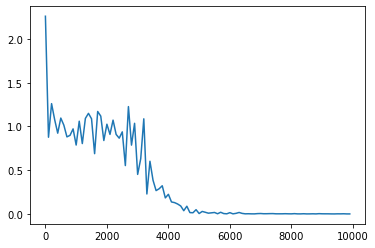

In [1]:
import sys
## sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('D:\stage3_data\DNN_code_colab_lesson_3_4')
sys.path.append('D:\stage3_data\DNN_code_colab_lesson_1_2')

import numpy as np
from common import functions
import matplotlib.pyplot as plt


def d_tanh(x):
    return 1/(np.cosh(x) ** 2)

# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)
# Xavier
# W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size))
# W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size))
# W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size))
# He
# W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size)) * np.sqrt(2)
# W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)
# W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)


# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])
#         z[:,t+1] = functions.relu(u[:,t+1])
#         z[:,t+1] = np.tanh(u[:,t+1])    
        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])
#         delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_relu(u[:,t+1])
#         delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * d_tanh(u[:,t+1])    

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()


##### ハンズオン中の試してみようを実施しました。
##### [try] weight_init_stdやlearning_rate, hidden_layer_sizeを変更してみよう

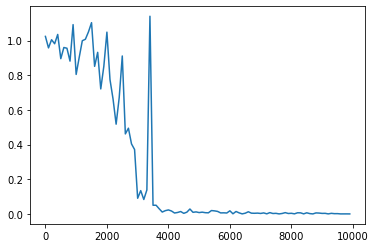

In [24]:
import sys
## sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('D:\stage3_data\DNN_code_colab_lesson_3_4')
sys.path.append('D:\stage3_data\DNN_code_colab_lesson_1_2')

import numpy as np
from common import functions
import matplotlib.pyplot as plt


def d_tanh(x):
    return 1/(np.cosh(x) ** 2)

# データを用意
# 2進数の桁数
##binary_dim = 8
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
## hidden_layer_size = 16
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化 (バイアスは簡単のため省略)
# W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
# W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
# W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)
# Xavier
## W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size))
## W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size))
## W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size))
# He
W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size)) * np.sqrt(2)
W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)
W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)


# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])
#         z[:,t+1] = functions.relu(u[:,t+1])
#         z[:,t+1] = np.tanh(u[:,t+1])    
        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])
#         delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_relu(u[:,t+1])
#         delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * d_tanh(u[:,t+1])    

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
##        print("iters:" + str(i))
##        print("Loss:" + str(all_loss))
##        print("Pred:" + str(out_bin))
##        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
##        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
##        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()


##### [try] 重みの初期化方法を変更してみよう
##### &emsp;&emsp;&emsp;Xavier, He

In [10]:
from IPython.display import Image
Image(url= 'https://raw.githubusercontent.com/mutsumutsu67/rapid_challenge/main/Stage4_day3_sction1_Xavier_He.jpg')

####  &emsp;&emsp; 1.3　確認テスト
##### 確認テスト①　RNNのネットワークには大きくわけて3つの重みがある。
##### &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;1つは入力から現在の中間層を定義する際にかけられる重み、
##### &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;1つは中間層から出力を定義する際にかけられる重みである。
##### &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;残り1つの重みについて説明せよ。
##### &emsp;&emsp;&emsp;&emsp; 解答：
##### &emsp;&emsp;&emsp;&emsp; 前（の時間）の中間層からの重み

##### 確認テスト②　連鎖律の原理を使い、dz/dxを求めよ。
##### &emsp;&emsp;&emsp;&emsp; $z = t^ 2$
##### &emsp;&emsp;&emsp;&emsp; $t = x + y $
##### &emsp;&emsp;&emsp;&emsp; 解答：
####    &emsp;&emsp; &emsp;&emsp; $ \frac{\partial z }{\partial x} $ = $ \frac{\partial z}{\partial t}$   $ \frac{\partial t}{\partial x}$ 
####    &emsp;&emsp; &emsp;&emsp; $ \frac{\partial z }{\partial t} $ = $ 2t$ ,  $ \frac{\partial t }{\partial x} $ = $ 1 $ 
####    &emsp;&emsp; &emsp;&emsp; $ \frac{\partial z }{\partial x} $ = $ 2(x + y )  $ 
##### 

### ２、Section2：LSTM全体像（前回の流れと課題全体像のビジョン）
####  &emsp;&emsp; 2.1　要点まとめ
####  &emsp;&emsp;&emsp;　RNNの勾配消失、勾配爆発を対応するために考えられた。
####  &emsp;&emsp;CEC
####  &emsp;&emsp;&emsp;勾配消失、勾配爆発問題の解消方法として勾配＝１の存在のメモリセル
####  &emsp;&emsp;&emsp;勾配＝１なのでニューラルネットワークとしての学習機能がない。
####  &emsp;&emsp;&emsp;そのためCECの周辺に学習機能を置くことになる。
####  &emsp;&emsp;入力ゲート：CECに覚え方を教える
####  &emsp;&emsp;出力ゲート：CECの出力をどんな風に使える（出力）（どの情報をどれだけ使うか）
####  &emsp;&emsp;忘却ゲート：過去のデータが不要になったら削除する。（このゲートが無いと過去のデータは蓄積されたまま。）

####  &emsp;&emsp; 2.2　実装演習結果と考察
####  &emsp;&emsp; ハンズオンはLSTMとGRUで共通。（GRUのsectionで記載）

####  &emsp;&emsp; 2.3　確認テスト
##### &emsp;&emsp; 　確認テスト①  シグモイド関数を微分した時、入力値が0の時に最大値をとる。
##### &emsp;&emsp; その値として正しいものを選択肢から選べ。
##### &emsp;&emsp;&emsp;&emsp; 　（1）0.15（2）0.25（3）0.35（4）0.45
##### &emsp;&emsp; 　解答：(2)

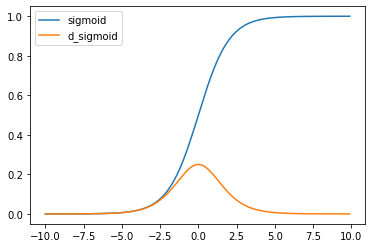

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
# シグモイド関数
# y = 1 / (1 * + e^(-x))
def sigmoid(a):
    s = 1 / (1 + e**-a)
    return s
# シグモイド関数の微分
# dy_sig = sigmoid(x) * (1 - sigmoid(x))
def d_sigmoid(a):
    s = sigmoid(a) * (1 - sigmoid(a))
    return s
e = math.e
dx = 0.1
x = np.arange(-10, 10, dx)
y_sig = sigmoid(x)
dy_sig = d_sigmoid(x)

plt.plot(x, y_sig, label="sigmoid")
plt.plot(x, dy_sig, label="d_sigmoid")
plt.legend()
plt.show()

###  ３、Section3：GRU
####  &emsp;&emsp; 3.1　要点まとめ
####  &emsp;&emsp;従来のLSTMがパラメータが多く計算量が多いので、精度を落とさず計算量を減らすことを
####  &emsp;&emsp;目的につくられたのがGRUとなる。パラメータを大幅に削減したが精度が同等はまたは
####  &emsp;&emsp;それ以上が望めるようになった。
####  &emsp;&emsp;構成はリセットゲートと更新ゲートで成り立っており、
####  &emsp;&emsp;更新ゲート：今の記憶を使ってどのような出力をするか。

####  &emsp;&emsp; 3.2　実装演習結果と考察(predict_word.ipynb)

In [ ]:
"""
import sys
## sys.path.append('/content/drive/My Drive/DNN_code')
sys.path.append('D:\stage3_data\DNN_code_colab_lesson_3_4')


##### tensorflow_version 1.x 追加　
tensorflow_version 1.x

###### ディレクトリを移動

import os

os.chdir('drive/My Drive/DNN_code_colab_lesson_3_4/lesson_3/3_2_tf_languagemodel/')


###### predict_word

import tensorflow as tf
import numpy as np
import re
import glob
import collections
import random
import pickle
import time
import datetime
import os

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

class Corpus:
    def __init__(self):
        self.unknown_word_symbol = "<???>" # 出現回数の少ない単語は未知語として定義しておく
        self.unknown_word_threshold = 3 # 未知語と定義する単語の出現回数の閾値
        self.corpus_file = "./corpus/**/*.txt"
        self.corpus_encoding = "utf-8"
        self.dictionary_filename = "./data_for_predict/word_dict.dic"
        self.chunk_size = 5
        self.load_dict()

        words = []
        for filename in glob.glob(self.corpus_file, recursive=True):
            with open(filename, "r", encoding=self.corpus_encoding) as f:

                # word breaking
                text = f.read()
                # 全ての文字を小文字に統一し、改行をスペースに変換
                text = text.lower().replace("\n", " ")
                # 特定の文字以外の文字を空文字に置換する
                text = re.sub(r"[^a-z '\-]", "", text)
                # 複数のスペースはスペース一文字に変換
                text = re.sub(r"[ ]+", " ", text)

                # 前処理： '-' で始まる単語は無視する
                words = [ word for word in text.split() if not word.startswith("-")]


        self.data_n = len(words) - self.chunk_size
        self.data = self.seq_to_matrix(words)

    def prepare_data(self):
        """
        訓練データとテストデータを準備する。
        data_n = ( text データの総単語数 ) - chunk_size
        input: (data_n, chunk_size, vocabulary_size)
        output: (data_n, vocabulary_size)
        """

        # 入力と出力の次元テンソルを準備
        all_input = np.zeros([self.chunk_size, self.vocabulary_size, self.data_n])
        all_output = np.zeros([self.vocabulary_size, self.data_n])

        # 準備したテンソルに、コーパスの one-hot 表現(self.data) のデータを埋めていく
        # i 番目から ( i + chunk_size - 1 ) 番目までの単語が１組の入力となる
        # このときの出力は ( i + chunk_size ) 番目の単語
        for i in range(self.data_n):
            all_output[:, i] = self.data[:, i + self.chunk_size] # (i + chunk_size) 番目の単語の one-hot ベクトル
            for j in range(self.chunk_size):
                all_input[j, :, i] = self.data[:, i + self.chunk_size - j - 1]

        # 後に使うデータ形式に合わせるために転置を取る
        all_input = all_input.transpose([2, 0, 1])
        all_output = all_output.transpose()

        # 訓練データ：テストデータを 4 : 1 に分割する
        training_num = ( self.data_n * 4 ) // 5
        return all_input[:training_num], all_output[:training_num], all_input[training_num:], all_output[training_num:]


    def build_dict(self):
        # コーパス全体を見て、単語の出現回数をカウントする
        counter = collections.Counter()
        for filename in glob.glob(self.corpus_file, recursive=True):
            with open(filename, "r", encoding=self.corpus_encoding) as f:

                # word breaking
                text = f.read()
                # 全ての文字を小文字に統一し、改行をスペースに変換
                text = text.lower().replace("\n", " ")
                # 特定の文字以外の文字を空文字に置換する
                text = re.sub(r"[^a-z '\-]", "", text)
                # 複数のスペースはスペース一文字に変換
                text = re.sub(r"[ ]+", " ", text)

                # 前処理： '-' で始まる単語は無視する
                words = [word for word in text.split() if not word.startswith("-")]

                counter.update(words)

        # 出現頻度の低い単語を一つの記号にまとめる
        word_id = 0
        dictionary = {}
        for word, count in counter.items():
            if count <= self.unknown_word_threshold:
                continue

            dictionary[word] = word_id
            word_id += 1
        dictionary[self.unknown_word_symbol] = word_id

        print("総単語数：", len(dictionary))

        # 辞書を pickle を使って保存しておく
        with open(self.dictionary_filename, "wb") as f:
            pickle.dump(dictionary, f)
            print("Dictionary is saved to", self.dictionary_filename)

        self.dictionary = dictionary

        print(self.dictionary)

    def load_dict(self):
        with open(self.dictionary_filename, "rb") as f:
            self.dictionary = pickle.load(f)
            self.vocabulary_size = len(self.dictionary)
            self.input_layer_size = len(self.dictionary)
            self.output_layer_size = len(self.dictionary)
            print("総単語数: ", self.input_layer_size)

    def get_word_id(self, word):
        # print(word)
        # print(self.dictionary)
        # print(self.unknown_word_symbol)
        # print(self.dictionary[self.unknown_word_symbol])
        # print(self.dictionary.get(word, self.dictionary[self.unknown_word_symbol]))
        return self.dictionary.get(word, self.dictionary[self.unknown_word_symbol])

    # 入力された単語を one-hot ベクトルにする
    def to_one_hot(self, word):
        index = self.get_word_id(word)
        data = np.zeros(self.vocabulary_size)
        data[index] = 1
        return data

    def seq_to_matrix(self, seq):
        print(seq)
        data = np.array([self.to_one_hot(word) for word in seq]) # (data_n, vocabulary_size)
        return data.transpose() # (vocabulary_size, data_n)

class Language:
    """
    input layer: self.vocabulary_size
    hidden layer: rnn_size = 30
    output layer: self.vocabulary_size
    """

    def __init__(self):
        self.corpus = Corpus()
        self.dictionary = self.corpus.dictionary
        self.vocabulary_size = len(self.dictionary) # 単語数
        self.input_layer_size = self.vocabulary_size # 入力層の数
        self.hidden_layer_size = 30 # 隠れ層の RNN ユニットの数
        self.output_layer_size = self.vocabulary_size # 出力層の数
        self.batch_size = 128 # バッチサイズ
        self.chunk_size = 5 # 展開するシーケンスの数。c_0, c_1, ..., c_(chunk_size - 1) を入力し、c_(chunk_size) 番目の単語の確率が出力される。
        self.learning_rate = 0.005 # 学習率
        self.epochs = 1000 # 学習するエポック数
        self.forget_bias = 1.0 # LSTM における忘却ゲートのバイアス
        self.model_filename = "./data_for_predict/predict_model.ckpt"
        self.unknown_word_symbol = self.corpus.unknown_word_symbol

    def inference(self, input_data, initial_state):
        """
        :param input_data: (batch_size, chunk_size, vocabulary_size) 次元のテンソル
        :param initial_state: (batch_size, hidden_layer_size) 次元の行列
        :return:
        """
        # 重みとバイアスの初期化
        hidden_w = tf.Variable(tf.truncated_normal([self.input_layer_size, self.hidden_layer_size], stddev=0.01))
        hidden_b = tf.Variable(tf.ones([self.hidden_layer_size]))
        output_w = tf.Variable(tf.truncated_normal([self.hidden_layer_size, self.output_layer_size], stddev=0.01))
        output_b = tf.Variable(tf.ones([self.output_layer_size]))

        # BasicLSTMCell, BasicRNNCell は (batch_size, hidden_layer_size) が chunk_size 数ぶんつながったリストを入力とする。
        # 現時点での入力データは (batch_size, chunk_size, input_layer_size) という３次元のテンソルなので
        # tf.transpose や tf.reshape などを駆使してテンソルのサイズを調整する。

        input_data = tf.transpose(input_data, [1, 0, 2]) # 転置。(chunk_size, batch_size, vocabulary_size)
        input_data = tf.reshape(input_data, [-1, self.input_layer_size]) # 変形。(chunk_size * batch_size, input_layer_size)
        input_data = tf.matmul(input_data, hidden_w) + hidden_b # 重みWとバイアスBを適用。 (chunk_size, batch_size, hidden_layer_size)
        input_data = tf.split(input_data, self.chunk_size, 0) # リストに分割。chunk_size * (batch_size, hidden_layer_size)

        # RNN のセルを定義する。RNN Cell の他に LSTM のセルや GRU のセルなどが利用できる。
        cell = tf.nn.rnn_cell.BasicRNNCell(self.hidden_layer_size)
        outputs, states = tf.nn.static_rnn(cell, input_data, initial_state=initial_state)
        
        # 最後に隠れ層から出力層につながる重みとバイアスを処理する
        # 最終的に softmax 関数で処理し、確率として解釈される。
        # softmax 関数はこの関数の外で定義する。
        output = tf.matmul(outputs[-1], output_w) + output_b

        return output

    def loss(self, logits, labels):
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))

        return cost

    def training(self, cost):
        # 今回は最適化手法として Adam を選択する。
        # ここの AdamOptimizer の部分を変えることで、Adagrad, Adadelta などの他の最適化手法を選択することができる
        optimizer = tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(cost)

        return optimizer

    def train(self):
        # 変数などの用意
        input_data = tf.placeholder("float", [None, self.chunk_size, self.input_layer_size])
        actual_labels = tf.placeholder("float", [None, self.output_layer_size])
        initial_state = tf.placeholder("float", [None, self.hidden_layer_size])

        prediction = self.inference(input_data, initial_state)
        cost = self.loss(prediction, actual_labels)
        optimizer = self.training(cost)
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(actual_labels, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

        # TensorBoard で可視化するため、クロスエントロピーをサマリーに追加
        tf.summary.scalar("Cross entropy: ", cost)
        summary = tf.summary.merge_all()

        # 訓練・テストデータの用意
        # corpus = Corpus()
        trX, trY, teX, teY = self.corpus.prepare_data()
        training_num = trX.shape[0]

        # ログを保存するためのディレクトリ
        timestamp = time.time()
        dirname = datetime.datetime.fromtimestamp(timestamp).strftime("%Y%m%d%H%M%S")

        # ここから実際に学習を走らせる
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            summary_writer = tf.summary.FileWriter("./log/" + dirname, sess.graph)

            # エポックを回す
            for epoch in range(self.epochs):
                step = 0
                epoch_loss = 0
                epoch_acc = 0

                # 訓練データをバッチサイズごとに分けて学習させる (= optimizer を走らせる)
                # エポックごとの損失関数の合計値や（訓練データに対する）精度も計算しておく
                while (step + 1) * self.batch_size < training_num:
                    start_idx = step * self.batch_size
                    end_idx = (step + 1) * self.batch_size

                    batch_xs = trX[start_idx:end_idx, :, :]
                    batch_ys = trY[start_idx:end_idx, :]

                    _, c, a = sess.run([optimizer, cost, accuracy],
                                       feed_dict={input_data: batch_xs,
                                                  actual_labels: batch_ys,
                                                  initial_state: np.zeros([self.batch_size, self.hidden_layer_size])
                                                  }
                                       )
                    epoch_loss += c
                    epoch_acc += a
                    step += 1

                # コンソールに損失関数の値や精度を出力しておく
                print("Epoch", epoch, "completed ouf of", self.epochs, "-- loss:", epoch_loss, " -- accuracy:",
                      epoch_acc / step)

                # Epochが終わるごとにTensorBoard用に値を保存
                summary_str = sess.run(summary, feed_dict={input_data: trX,
                                                           actual_labels: trY,
                                                           initial_state: np.zeros(
                                                               [trX.shape[0],
                                                                self.hidden_layer_size]
                                                           )
                                                           }
                                       )
                summary_writer.add_summary(summary_str, epoch)
                summary_writer.flush()
"""

In [6]:
# IPythonのインポート
from IPython.display import Image
# ネット画像のurlを直接開いて表示
Image(url= 'https://raw.githubusercontent.com/mutsumutsu67/rapid_challenge/main/stage4_day3_3.jpg')

####  &emsp;&emsp; 3.3　確認テスト
##### &emsp;&emsp; 　確認テスト①LSTMとCECが抱える課題について、それぞれ簡潔に述べよ。
##### &emsp;&emsp; 　解答：
##### &emsp;&emsp; 　LSTM  :  パラメータ数が多い。計算量が多い。
##### &emsp;&emsp; 　CEC　 : 学習能力がない。(勾配=1)
##### &emsp;&emsp; 　確認テスト②LSTMとGRUの違いを簡潔に述べよ。
##### &emsp;&emsp; 　解答：
##### &emsp;&emsp; 　LSTM  :  ゲート数は３（入力、出力、忘却）。CECが有る。
##### &emsp;&emsp; 　GRU :　ゲート数は２（リセット、更新）。CECが無い。

###  ４、Section4：双方向RNN
####  &emsp;&emsp; 4.1　要点まとめ
#### &emsp;&emsp; 過去の情報だけでなく、未来の情報を加味することで精度を向上させるためのモデル
#### &emsp;&emsp; 実用例：文章の構成


In [3]:
from IPython.display import Image
Image(url= 'https://raw.githubusercontent.com/mutsumutsu67/rapid_challenge/main/stage4_day3_sec4_1.jpg')

####  &emsp;&emsp; 4.2　実装演習結果と考察

In [4]:
# 演習チャレンジ
from IPython.display import Image
Image(url= 'https://raw.githubusercontent.com/mutsumutsu67/rapid_challenge/main/stage4_day3_sec4_2.jpg')

###  ５、Section5：Seq2Seq
####  &emsp;&emsp; 5.1　要点まとめ

####  &emsp;&emsp; Encoder-Decoderモデルの一種。

In [1]:
from IPython.display import Image
Image(url= 'https://raw.githubusercontent.com/mutsumutsu67/rapid_challenge/main/swq2swq.jpg')

####  以下のUrlの説明がわかりやすかったので、記載しておきます。
#####  https://tips-memo.com/translation-jayalmmar-attention
####  &emsp;&emsp; Encoder : 単語をRNNに入力していき蓄積いく。文脈の意味ベクトルとして出力する。
####  &emsp;&emsp; Encoder : Decoder: encoderから入力された意味ベクトルを別の出力する。

In [5]:
from IPython.display import Image
Image(url= 'https://raw.githubusercontent.com/mutsumutsu67/rapid_challenge/main/stage4_day3_sec5_encode.jpg')

In [6]:
from IPython.display import Image
Image(url= 'https://raw.githubusercontent.com/mutsumutsu67/rapid_challenge/main/stage4_day3_sec5_encode_MLM.jpg')

In [7]:
from IPython.display import Image
Image(url= 'https://raw.githubusercontent.com/mutsumutsu67/rapid_challenge/main/stage4_day3_sec5_decode.jpg')

####  &emsp;&emsp; Seq2seqの課題:
####  &emsp;&emsp;   - 課題一問一答しかできない
####  &emsp;&emsp;   - 問に対して文脈も何もなく、ただ応答が行われる続ける。
####  &emsp;&emsp;  対策：
####  &emsp;&emsp; 　　HREDで対応。


####  &emsp;&emsp; HREDとは、
####  &emsp;&emsp; 　 過去n-1 個の発話から次の発話を生成
####  &emsp;&emsp; HREDの構造：
####  &emsp;&emsp; 　Seq2Seq+ Context RNN
####  &emsp;&emsp; 　　Context RNN: Encoder のまとめた各文章の系列を
####  &emsp;&emsp; 　まとめて、これまでの会話コンテキスト全体を表す
####  &emsp;&emsp; 　ベクトルに変換する構造。

####  &emsp;&emsp; Context RNN：
####  &emsp;&emsp; 　過去の発話の履歴を加味した返答をできる。

####  &emsp;&emsp; HREDの課題：
####  &emsp;&emsp;  - HRED は確率的な多様性が字面にしかなく、会話の「流れ」のような多様性が無い。
####  &emsp;&emsp;  - 短く情報量に乏しい答えをしがち　(ex.うん」「そうだね」「・・・」など。) 
####  &emsp;&emsp;  対策：
####  &emsp;&emsp; 　VHREDで対応。

####  &emsp;&emsp; VHREDとは、
####  &emsp;&emsp; 　HREDに、VAEの潜在変数の概念を追加したもの。
####  &emsp;&emsp; 　HREDの課題を、VAEの潜在変数の概念を追加することで解決した構造

####  &emsp;&emsp; VAEとは、
####  &emsp;&emsp; 　データを潜在変数zの確率分布という構造に
####  &emsp;&emsp; 　押し込めることを可能にします。通常のオートエンコーダーの場合、
####  &emsp;&emsp; 　何かしら潜在変数zにデータを押し込めているものの、その構造が
####  &emsp;&emsp; 　どのような状態かわからない。VAEはこの潜在変数zに確率分布z∼N(0,1)を仮定したもの。



####  &emsp;&emsp; 5.2　実装演習結果と考察

In [8]:
from IPython.display import Image
Image(url= 'https://raw.githubusercontent.com/mutsumutsu67/rapid_challenge/main/stage4_day3_sec5_xx.jpg')

####  &emsp;&emsp; 5.3　確認テスト
##### &emsp;&emsp; 　確認テスト①下記の選択肢から、seq2seqについて説明しているものを選べ。
##### &emsp;&emsp; 　解答：(2)
##### &emsp;&emsp; 　確認テスト②seq2seqとHRED、HREDとVHREDの違いを簡潔に述べよ。
##### &emsp;&emsp; 　解答：
##### &emsp;&emsp; 　seq2seq : 一問一答の時系列モデル
##### &emsp;&emsp; 　HRED: 文脈の意味をくみ取って回答するようにしたもの。
##### &emsp;&emsp; 　VHRED: HREDがあたりさわりのない回答をするのに対してVAEの考えを取り入れて改良を加えたもの。
##### &emsp;&emsp; 　確認テスト③　VAEに関する下記の説明文中の空欄に当てはまる言葉を答えよ。
##### &emsp;&emsp; 　　　自己符号化器の潜在変数に____を導入したもの。
##### &emsp;&emsp; 　解答：確率分布


###  ６、Section6：Word2vec
####  &emsp;&emsp; 6.1　要点まとめ

####  &emsp;&emsp; 　Word2Vecも単語の分散表現の獲得を目指した手法
####  &emsp;&emsp; 　「単語の分散表現」とは、単語を固定長のベクトルで表現すること
####  &emsp;&emsp; 　単語をベクトルで表現することができれば単語の意味を定量的に把握することができるため、
####  &emsp;&emsp; 　様々な処理に応用することが出来る。
####  &emsp;&emsp; 　Word2vecで使用するニューラルネットワークのモデル
####  &emsp;&emsp;&emsp;&emsp;  　CBOW(continuous bag-of-words)
####  &emsp;&emsp;&emsp;&emsp;  　skip-gram



####  &emsp;&emsp; 6.2　実装演習結果と考察
#### 以下のURLを参考にword2vecを演習。
https://qiita.com/propella/items/febc423998fd210800ca

###  ７、Section7：Attention Mechanism
####  &emsp;&emsp; 7.1　要点まとめ

In [9]:
from IPython.display import Image
Image(url= 'https://raw.githubusercontent.com/mutsumutsu67/rapid_challenge/main/stage4_day3_sec7.jpg')

####  &emsp;&emsp; 7.2　確認テスト
##### &emsp;&emsp; 　確認テスト①　RNNとword2vec、seq2seqとAttentionの違いを簡潔に述べよ。
##### &emsp;&emsp; 　解答：
##### &emsp;&emsp; 　RNN  :  時系列データ処理に適した手法
##### &emsp;&emsp; 　word2vec :　単語分散ベクトルを得る手法
##### &emsp;&emsp; 　seq2seq  :  　一つの時系列データから別の時系列データを得る手法
##### &emsp;&emsp; 　Attention :　時系列データの中身の関連性に重みをつける